In [7]:
import pandas as pd
import streamlit as st
import graphviz


# TODO: How do we make this in front (beyond the "put it in render")?


df = pd.DataFrame(
    [['this', 'func', 'that'], ['The, quick', 'brown', 'fox, jumps']],
    columns=["Outputs", "Function", "Inputs"],
)




def df_to_triples(df):
    for row in df.itertuples():
        yield row.Outputs, row.Function, row.Inputs


def triple_to_edges(triple_gen):
    for outputs, func, inputs in triple_gen:
    #outputs, func, inputs = triple
        func = func.strip()
        for output in outputs.split(','):
            for input in inputs.split(','):
                yield output.strip(), func
                yield func, input.strip()


from dol import Pipe

row_to_edges = Pipe(df_to_triples, triple_to_edges)
list(df_to_triples(df))

[('this', 'func', 'that'), ('The, quick', 'brown', 'fox, jumps')]

In [8]:
list(row_to_edges(df))

[('this', 'func'),
 ('func', 'that'),
 ('The', 'brown'),
 ('brown', 'fox'),
 ('The', 'brown'),
 ('brown', 'jumps'),
 ('quick', 'brown'),
 ('brown', 'fox'),
 ('quick', 'brown'),
 ('brown', 'jumps')]

In [9]:
df.itertuples()

In [10]:
import streamlit as st
edited_df = st.experimental_data_editor(df, num_rows="dynamic")

2023-05-10 10:14:45.909 
  command:

    streamlit run /Users/sylvain/opt/anaconda3/envs/otopy310/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]


In [12]:
list(edited_df.itertuples())

[Pandas(Index=0, Outputs='this', Function='func', Inputs='that'),
 Pandas(Index=1, Outputs='The, quick', Function='brown', Inputs='fox, jumps')]

In [20]:
list(edited_df.iterrows())[0][1].keys()

Index(['Outputs', 'Function', 'Inputs'], dtype='object')

In [21]:
from meshed import DAG, code_to_dag

In [22]:
dag_string= """
out = chunker(wf)
"""

In [23]:
code_to_dag(dag_string)

AttributeError: 'Assign' object has no attribute 'body'

In [34]:
from meshed.makers import parse_assignment_steps, parsed_to_node_kwargs
def foo():
    x = func1(a, b)
    y = func2(x, func1, c, d=x)
    


In [35]:
from typing import Iterator, Union
from meshed import FuncNode
from meshed.makers import FuncNodeFactory, node_kwargs_to_func_node_factory,mk_fnodes_from_fn_factories, src_to_func_node_factory
# def src_to_func_node_factory(
#     src, exclude_names=None
# ) -> Iterator[Union[FuncNode, FuncNodeFactory]]:
#     """
#     :param src: Callable or string of callable.
#     :param exclude_names: Names to exclude when making func_nodes
#     :return:
#     """
#     exclude_names = set(exclude_names or set())
#     for i, target_value in enumerate(parse_assignment_steps(src), 1):
#         #print(i, target_value)
#         for node_kwargs in parsed_to_node_kwargs(target_value):
#             print(node_kwargs)
#             node_kwargs['func_label'] = node_kwargs['name']
#             if node_kwargs['name'] in exclude_names:
#                 # need to keep names uniques, so add a prefix to (hope) to get uniqueness
#                 node_kwargs['name'] += f'_{i:02.0f}'
#             exclude_names.add(node_kwargs['name'])
#             yield node_kwargs_to_func_node_factory(node_kwargs)

In [36]:
>>> fnodes_factories=list(src_to_func_node_factory(foo))
>>> from meshed.dag import DAG
>>> from meshed.makers import mk_fnodes_from_fn_factories
>>> print(fnodes_factories[0])
#>>> fnodes = list(mk_fnodes_from_fn_factories(fnodes_factories))
#>>> dag = DAG(fnodes)

functools.partial(<class 'meshed.base.FuncNode'>, name='func1', out='x', bind={0: 'a', 1: 'b'}, func_label='func1')


In [37]:
from i2 import Sig
ffact = fnodes_factories[0]
Sig(ffact)

<Sig (func: Callable, *, name: str = 'func1', bind: dict = {0: 'a', 1: 'b'}, out: str = 'x', func_label: str = 'func1', names_maker: Callable = <function underscore_func_node_names_maker at 0x7fde552adab0>, node_validator: Callable = <function basic_node_validator at 0x7fde55387ac0>) -> None>

In [38]:
def my_func1(a,b):
    return a

In [39]:
ffact(func =my_func1)

FuncNode(a,b -> func1 -> x)

In [2]:
>>> from meshed import FuncNode

>>> def user_story():
...     wfs = call(src_to_wf, data_src)
...     chks_iter = map(chunker, wfs)
...     chks = chain(chks_iter)
...     fvs = map(featurizer, chks)
...     model_outputs = map(model, fvs)


>>> from meshed.makers import src_to_func_node_factory
>>> fnodes_factories = list(src_to_func_node_factory(user_story))



>>> from functools import partial
>>> assert all(
... isinstance(x, partial) and issubclass(x.func, FuncNode) for x in fnodes_factories
... )



>>> assert [x.keywords for x in fnodes_factories] == [
...  {'name': 'call',
...   'out': 'wfs',
...   'bind': {0: 'src_to_wf', 1: 'data_src'},
...   'func_label': 'call'},
...  {'name': 'map',
...   'out': 'chks_iter',
...   'bind': {0: 'chunker', 1: 'wfs'},
...   'func_label': 'map'},
...  {'name': 'chain',
...   'out': 'chks',
...   'bind': {0: 'chks_iter'},
...   'func_label': 'chain'},
...  {'name': 'map_04',
...   'out': 'fvs',
...   'bind': {0: 'featurizer', 1: 'chks'},
...   'func_label': 'map'},
...  {'name': 'map_05',
...   'out': 'model_outputs',
...   'bind': {0: 'model', 1: 'fvs'},
...   'func_label': 'map'}
... ]


>>> from meshed.dag import DAG
>>> from meshed.makers import mk_fnodes_from_fn_factories
>>> fnodes = list(mk_fnodes_from_fn_factories(fnodes_factories))
>>> dag = DAG(fnodes)
>>> print(dag.synopsis_string())

src_to_wf,data_src -> call -> wfs
chunker,wfs -> map -> chks_iter
chks_iter -> chain -> chks
featurizer,chks -> map_04 -> fvs
model,fvs -> map_05 -> model_outputs


In [4]:
dag.ch_funcs(chain = chain)

NameError: name 'chain' is not defined

In [14]:
def f(a, b: int, /):
    return a + b


def g(a_plus_b, d: float = 4):
    return a_plus_b * d

In [17]:
dag=DAG([f,g])

In [18]:
dag.func_nodes

[FuncNode(a,b -> f_ -> f), FuncNode(a_plus_b,d -> g_ -> g)]

In [19]:
dag.ch_funcs(f=f, g=g)

DAG(func_nodes=[FuncNode(a,b -> f_ -> f), FuncNode(a_plus_b,d -> g_ -> g)], name=None)

In [20]:
from i2 import Sig
Sig(dag.ch_funcs)

<Sig (ch_func_node_func: Callable[[meshed.base.FuncNode, Callable, Callable[[Callable, Callable], ~Comparison]], meshed.base.FuncNode] = <function ch_func_node_func at 0x7f831d56cc10>, /, **func_mapping: Callable) -> 'DAG'>

In [67]:
kwords = [{'name': 'call',
   'out': 'wfs',
   'bind': {0: 'src_to_wf', 1: 'data_src'},
   'func_label': 'call'},
  {'name': 'map',
   'out': 'chks_iter',
   'bind': {0: 'chunker', 1: 'wfs'},'func_label': 'map'},]

In [68]:
kwords = [{'name': 'call',
   'out': 'wfs',
   'bind': {0: 'src_to_wf', 1: 'data_src'},
   'func_label': 'call'},
  {'name': 'map',
   'out': 'chks_iter',
   'bind': {0: 'chunker', 1: 'wfs'},'func_label': 'map'},]
fnodes_factories = map(node_kwargs_to_func_node_factory, kwords)
fnodes = list(mk_fnodes_from_fn_factories(fnodes_factories))
dag = DAG(fnodes)

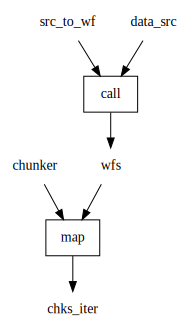

In [70]:
dag.dot_digraph()

In [79]:
func_src = {'func1':my_func1, 'func2':my_func2}
for item in mk_fnodes_from_fn_factories(fnodes_factories, func_src):
    print(item)

{'name': 'func1', 'out': 'x', 'bind': {0: 'a', 'b': 2}}


TypeError: 'dict' object is not callable

In [52]:
node_kw = {'name': 'func1', 'out': 'x', 'bind': {0: 'a', 1:'b' }}
ffact = node_kwargs_to_func_node_factory(node_kw)
ffact(my_func1)
fnodes_factories =[ffact]
#fnodes = list(mk_fnodes_from_fn_factories(fnodes_factories))

In [54]:
ffact(my_func1)

FuncNode(a,b -> func1 -> x)

In [47]:
Sig(ffact)

<Sig (func: Callable, *, name: str = 'func1', bind: dict = {0: 'a', 1: 'b'}, out: str = 'x', func_label: str = None, names_maker: Callable = <function underscore_func_node_names_maker at 0x7fde552adab0>, node_validator: Callable = <function basic_node_validator at 0x7fde55387ac0>) -> None>

In [48]:
def my_func1(a,b):
    return str(a+b)

def my_func2(x,func1,c,d):
    return d

In [49]:
ffact(func=my_func1)

FuncNode(a,b -> func1 -> x)

In [21]:
 >>> from meshed import FuncNode, DAG
>>> from i2 import Sig
>>>
>>> def f(a, b):
...     return a + b
...
>>>
>>> def g(a_plus_b, x):
...     return a_plus_b * x
...
>>> f_node = FuncNode(func=f, out='a_plus_b')
>>> g_node = FuncNode(func=g, bind={'x': 'b'})
>>> d = DAG((f_node, g_node))
>>> print(d.synopsis_string())
#a,b -> f -> a_plus_b
#b,a_plus_b -> g_ -> g
>>> d(2, 3)  # (2 + 3) * 3 == 5 * 3
#15
>>> dd = d.ch_funcs(f=lambda a, b: a - b)
>>> dd(2, 3)  # (2 - 3) * 3 == -1 * 3
#-3

a,b -> f -> a_plus_b
b,a_plus_b -> g_ -> g


-3

In [25]:
>>> from meshed import compare_signatures
>>> from meshed.dag import ch_func_node_func
>>> from functools import partial
>>> on_names = lambda sig1, sig2: list(sig1.parameters) == list(sig2.parameters)
>>> same_names = partial(compare_signatures, signature_comparator=on_names)
>>> ch_fnode = partial(ch_func_node_func, func_comparator=same_names)
>>> d = dag.ch_funcs(ch_fnode, g=lambda y, z: y / z);
>>> Sig(d)
#<Sig (a, b, y)>
>>> d(2, 3, 4)
#        0.8

ValueError: You can only change the func of a FuncNode with a another func if the signatures match.
	fn=FuncNode(a_plus_b,d -> g_ -> g)
	Sig(fn.func)=<Sig (a_plus_b, d: float = 4)>
	Sig(func)=<Sig (y, z)>


In [26]:
from meshed.dag import ch_func_node_func


<div class="mermaid">
graph LR
  A --- B
  B-->C[fa:fa-ban forbidden]
  B-->D(fa:fa-spinner);
</div>

In [1]:
TEMPLATE_MERMAIDJS="""<html>
    <body>
        <script src="https://cdn.jsdelivr.net/npm/mermaid/dist/mermaid.min.js"></script>
        <script>
            mermaid.initialize({{ startOnLoad: true }});
        </script>
 
        <div class="mermaid">
            {src}
        </div>
 
    </body>
</html>
"""

In [9]:
from IPython.core.magic import Magics, magics_class, cell_magic, line_cell_magic
from IPython.core import magic_arguments
from pyflowchart import Flowchart
 
@magics_class
class JSdiagrammerMagics(Magics):
    """Magics for Javascript diagramming."""
    def __init__(self, shell):
        super(JSdiagrammerMagics, self).__init__(shell)
 
    @line_cell_magic
    @magic_arguments.magic_arguments()
    @magic_arguments.argument(
        "--file", "-f", help="Source for audio file."
    )
    def wavesurfer_magic(self, line, cell=None):
        "Send code to wavesurfer.js."
        args = magic_arguments.parse_argstring(self.wavesurfer_magic, line)
        if not args.file:
            return
        return js_ui({"src":args.file}, TEMPLATE_WAVESURFERJS, height=200)
 
    @cell_magic
    @magic_arguments.magic_arguments()
    @magic_arguments.argument(
        "--height", "-h", default="300", help="IFrame height."
    )
    def mermaid_magic(self, line, cell):
        "Send code to mermaid.js."
        args = magic_arguments.parse_argstring(self.mermaid_magic, line)
        return js_ui({"src":cell}, TEMPLATE_MERMAIDJS, height=args.height)
 
def load_ipython_extension(ip):
    """Load the extension in IPython."""
    ipython.register_magics(JSdiagrammerMagics)
     
ip = get_ipython()
ip.register_magics(JSdiagrammerMagics)

In [3]:
!pip3 install pyflowchart

In [6]:
from pyflowchart import Flowchart


%%mermaid_magic -h 350
sequenceDiagram
    Alice->>John: Hello John, how are you?
    John ->>Alice: Great!


In [11]:
import io
import uuid
from pathlib import Path
from IPython.display import IFrame
 
def js_ui(data, template, out_fn = None, out_path='.',
          width="100%", height="", **kwargs):
    """Generate an IFrame containing a templated javascript package."""
    if not out_fn:
        out_fn = Path(f"{uuid.uuid4()}.html")
         
    # Generate the path to the output file
    out_path = Path(out_path)
    filepath = out_path / out_fn
    # Check the required directory path exists
    filepath.parent.mkdir(parents=True, exist_ok=True)
 
    # The open "wt" parameters are: write, text mode;
    with io.open(filepath, 'wt', encoding='utf8') as outfile:
        # The data is passed in as a dictionary so we can pass different
        # arguments to the template
        outfile.write(template.format(**data))
 
    return IFrame(src=filepath, width=width, height=height)

In [12]:
mcode = """
graph TD;
    A-->B;
    A-->C;
    B-->D;
    C-->D;
"""

In [13]:
js_ui({"src":mcode}, TEMPLATE_MERMAIDJS)

In [14]:
TEMPLATE_WAVEDROM = """<!DOCTYPE html>
<html>
    <head>
        <meta charset="UTF-8">
        <title>wavedrom.js</title>
<script src="https://cdnjs.cloudflare.com/ajax/libs/wavedrom/2.6.8/skins/default.js" type="text/javascript"></script>
<script src="https://cdnjs.cloudflare.com/ajax/libs/wavedrom/2.6.8/wavedrom.min.js" type="text/javascript"></script>
</head>
        <body onload="WaveDrom.ProcessAll()">
<script type="WaveDrom">
{src}
</script>
        </body>
</html>
"""

In [17]:
wcode="""{ signal : [
  { name: "plc",  wave: "p......" },
  { name: "bus",  wave: "x.34.5x",   data: "head body tail" },
  { name: "wire", wave: "0.1..0." },
]}
"""

In [18]:
js_ui({"src":wcode}, TEMPLATE_WAVEDROM)

In [19]:
%load_ext nb_js_diagrammers



In [20]:
%%mermaid_magic -h 500

flowchart TD
    A[Start] --> B{Is it?};
    B -->|Yes| C[OK];
    C --> D[Rethink];
    D --> B;
    B ---->|No| E[End];

```{mermaid}
flowchart LR
  A[Hard edge] --> B(Round edge)
  B --> C{Decision}
  C --> D[Result one]
  C --> E[Result two]
```

* user has a certain use case (say: they need to get some folder or zip file and build an outlier model from it). An outlier model that needs to run on another flder (train folder and test folder)
* first: two folders, with wav files. The store is easy (a Wav Store, already made)
* second: need to creat a seq of chks, put it in off the shelf featurizer and go through an outlier model, get a dpp out of it. Dpp for training and one for testing
* test it

* how to do it: put train and test together
* some choices were made: dflt chker, dflt feat. and model. What if I don't want the defaults. How to get control on those?
  * one way: I make specific chkers, featurizers, by using funcfactories, and then put those together, or if possible (ok in the backend side): you inject different functions
  * other way: when you create the pipeline, you do parametrized line way (expose the chk size): the pipeline is parametrized. 
* what if we have other things than wav files? ex. stuff to ignore, or may be another source (show the storemaker side of the dpp). 
* nonlinear
* what if I have a dataset, and need to do a train/test? I have only one folder, and need to do a filter. Make some key separation on train/test: what are components to do that?
* we could throw some visual components: take the dpp, and visualize the nodes of it.
* how about we run it on something live? Check Andie's live plotter.

In [1]:
import umap

2023-05-12 16:27:56.285260: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
red = umap.UMAP()

AttributeError: module 'umap' has no attribute 'UMAP'

```{mermaid}
flowchart LR
  a & b --> f --> f_out
```

```{mermaid}
flowchart LR
  AA[ZipFile] -->A(FilesOfZip)
  A --> C(mk_zip_store)
  B(remove_mac_junk) --> C
  D(filter_wav_files) --> E(mk_zip_wav_store)
  C --> E
```

In [ ]:
store = mk_wav_zip_store, input =filepath

# FuncNode(f.chunks_from_store, out='chunks', func_label='get_chunks'),input =store
#         FuncNode(f.chunks_2_vol_diffs, bind={0: 'chunks'}, out='hi_vols_change', func_label='get_hi_vols'),
#         FuncNode(f.bitmap, bind={0: 'chunks', 1: 'hi_vols_change'}, out='burst_chunks'),
#         FuncNode(f.aggregate_non_none_sequences, bind={0: 'burst_chunks'}, out='hi_segments'),

In [9]:
from meshed import DAG, FuncNode, code_to_dag
DAG([
        FuncNode(f.chunks_from_store, out='chunks', func_label='get_chunks'),
        FuncNode(f.chunks_2_vol_diffs, bind={0: 'chunks'}, out='hi_vols_change', func_label='get_hi_vols'),
        FuncNode(f.bitmap, bind={0: 'chunks', 1: 'hi_vols_change'}, out='burst_chunks'),
        FuncNode(f.aggregate_non_none_sequences, bind={0: 'burst_chunks'}, out='hi_segments'),
])

NameError: name 'f' is not defined

In [6]:
from meshed import code_to_dag
@code_to_dag
def classify():
    wf_store = get_wfs(wf_src)
    annots = get_annots(wf_store)
    X_train, y_train, X_test, y_test = mk_Xy(wf_store, annots)
    model, preprocessor = train(learner, X_train, y_train)
    results = apply(model, preprocessor, X_test)
    #return results

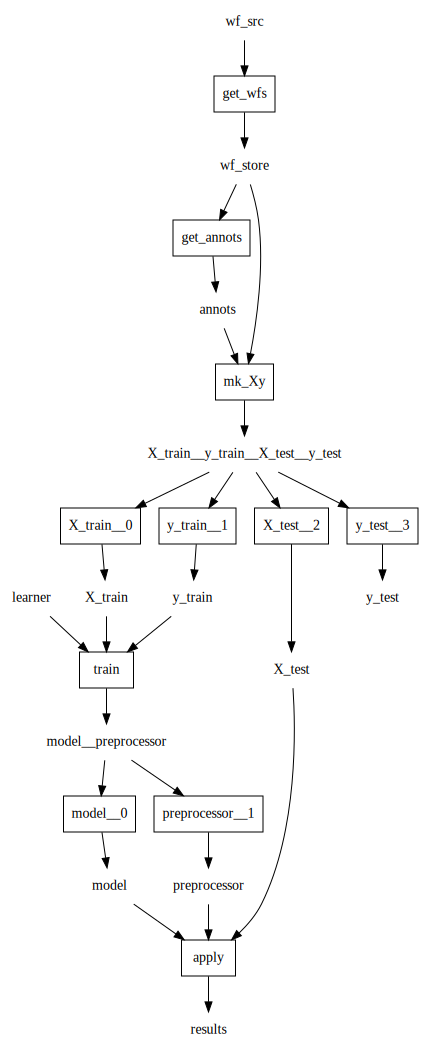

In [7]:
classify.dot_digraph()